# Logistic Regression
## Ví dụ A.1

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2)

# Init data

X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])


In [69]:
# function K-NN
k = 5
def distance(array, value):
    array = np.array(array)
    return np.absolute(array - value)

# def distance(array, value):
#     array = np.array(array)
#     return np.linalg.norm(array - value, ord= 2, axis=(X.shape[0], 1))

def find_nearest_index(array, value, k):
    array_D = distance(array, value)

    return np.argsort(array_D)[:k]

In [70]:
X_train = X
y_train = y
X_test = np.array([2.45, 1.85, 3.75, 3.21, 4.05])

Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] += y_train[id]
    Y_pred[i] = Y_pred[i] / len(indexis)
    if Y_pred[i] >= 0.5:
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0
    print(Y_pred[i])

0.0
0.0
1.0
0.0
1.0


In [1]:
# using sklearn
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X_train = X.T
Y_train = y

X_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]]).T

model = KNeighborsRegressor(n_neighbors= 5)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred)


[0.4 0.4 0.6 0.4 0.8]


## Ví dụ B.1

In [25]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

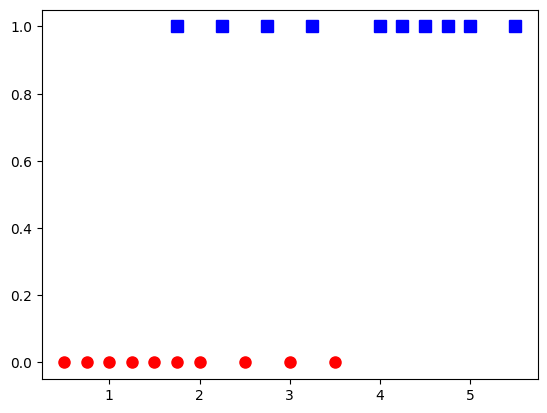

In [26]:
# plot data
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [27]:
# function logistic regression

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
# loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
        # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [29]:
# print W
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
print(sigmoid(np.dot(w[-1].T, X)))

[[-4.08175132]
 [ 1.59767816]]
[[0.03616207 0.05297564 0.07698228 0.11059738 0.15640363 0.21656209
  0.21656209 0.29185433 0.38060633 0.47812499 0.57734009 0.67068463
  0.75226009 0.81907932 0.9096165  0.93751937 0.95721336 0.9708925
  0.9802884  0.9910355 ]]


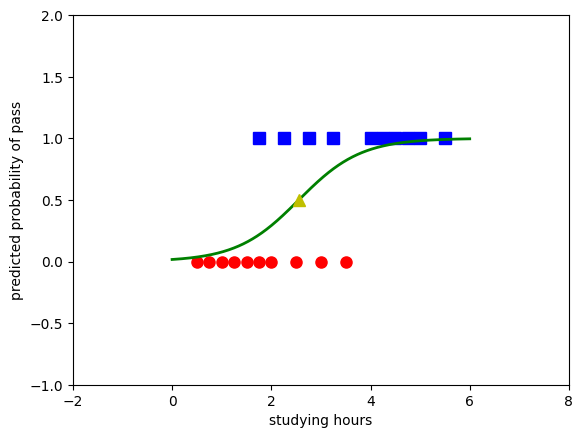

In [30]:
# print solution
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [44]:
X_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
X_test = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis = 0)
Y_pred = sigmoid(np.dot(w[-1].T, X_test))

for i in range(len(X_test[0])):
    if Y_pred[0][i] >= 0.5:
        Y_pred[0][i] = 1
    else:
        Y_pred[0][i] = 0
    print(Y_pred[0][i])

0.0
0.0
1.0
1.0
1.0


## Ví dụ A.2

In [4]:
import pandas as pd

data = pd.read_csv('D:\\Machine Learning\\logistic_regression\\data\\vidu4_lin_reg.txt', delim_whitespace=True)

X = data[['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']].values
Y = data['BEDAYNTM'].values
Y_1 = Y
for i in range(len(Y)):
    if Y[i] >= 1:
        Y[i] = 1
    else:
        Y[i] = 0

# split data train and test

X_data_train = X[:80]
Y_data_train = Y[:80]

X_data_test = X[80:]
Y_data_test = Y_1[80:]


[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]


C:\Users\Admin\AppData\Local\Temp\ipykernel_5788\2107319919.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('D:\\Machine Learning\\logistic_regression\\data\\vidu4_lin_reg.txt', delim_whitespace=True)


In [10]:
# using sklearn
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors= 5)
model.fit(X_data_train, Y_data_train)
y_pred = model.predict(X_data_test)
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

print(y_pred)
print(Y_data_test)

[0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.]
[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]


In [9]:
# Danh gia mo hinh
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print('Accuracy: ', accuracy_score(Y_data_test, y_pred))

print('Precision: ', precision_score(Y_data_test, y_pred))

print('Recall: ', recall_score(Y_data_test, y_pred))

print('Confusion matrix: ', confusion_matrix(Y_data_test, y_pred))

Accuracy:  0.7
Precision:  0.7142857142857143
Recall:  0.5555555555555556
Confusion matrix:  [[9 2]
 [4 5]]


## Ví dụ B.2

In [11]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20

X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


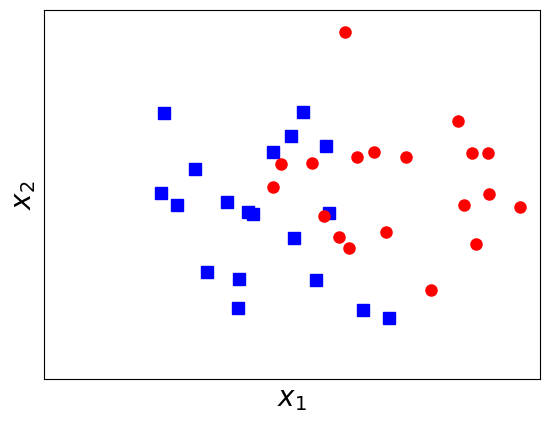

In [12]:
# plot data
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [13]:
# sigmoid function

def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function

In [14]:
# function logistic regression

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [15]:
# extend data

X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


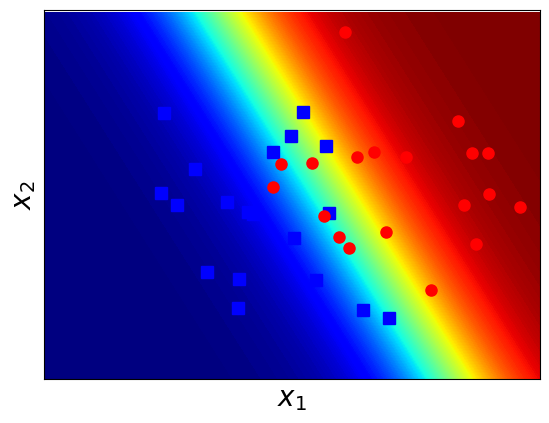

In [19]:
# plot the solution
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

## Ví dụ B.3

In [6]:
# importing module
import numpy as np
from pandas import *
# reading CSV file
data = read_csv("D:\\Machine Learning\\logistic_regression\\data\\Admission_Predict.csv")
# converting column data to list, then convert list to array
sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)

prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)
# printing list data
print(Yt)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

In [8]:
# split data train and test

X_data_train = np.array([X1[:350], X2[:350], X3[:350], X4[:350], X5[:350], X6[:350], X7[:350]]).T
X_data_test = np.array([X1[350:], X2[350:], X3[350:], X4[350:], X5[350:], X6[350:], X7[350:]]).T

X_data_train_nb = np.array([X1[:350], X2[:350], X3[:350], X4[:350], X5[:350], X6[:350], X7[:350]]).T
X_data_test_nb = np.array([X1[350:], X2[350:], X3[350:], X4[350:], X5[350:], X6[350:], X7[350:]]).T


Y_data_train = np.array([Yt[:350]]).T
Y_data_test = np.array([Yt[350:]]).T

Y_data_train_nb = np.array([Yt[:350]]).T
Y_data_test_nb = np.array([Yt[350:]]).T

X0 = np.ones((X_data_train.shape[0], 1))
X_data_train = np.concatenate((X0, X_data_train), axis = 1)

print(np.shape(Y_data_train_nb.T))
print(np.shape(X_data_train_nb.T))



(1, 350)
(7, 350)


In [45]:
# function sigmoid
def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function

In [46]:
# function logistic regression

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [87]:
# initialize parameters w = w_init
eta = 0.05
d = X_data_train.shape[1]
w_init = np.random.randn(d, 1)
# call logistic_sigmoid_regression procedure

w = logistic_sigmoid_regression(X_data_train.T, Y_data_train, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[ -1.32989618]
 [-14.04425898]
 [ 58.66976713]
 [ 43.87523144]
 [ 33.00441371]
 [ 30.77776108]
 [ 14.793038  ]
 [ 15.93445185]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_5788\1645080387.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s)) # calculate sigmoid function


In [89]:
# predict data
X0 = np.ones((X_data_test.shape[0], 1))
X_data_test = np.concatenate((X0, X_data_test), axis = 1)
Y_pred = sigmoid(np.dot(w[-1].T, X_data_test.T))

for i in range(len(Y_pred[0])):
    if Y_pred[0][i] >= 0.5:
        Y_pred[0][i] = 1
    else:
        Y_pred[0][i] = 0
    print(Y_pred[0][i])


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [94]:
# Danh gia mo hinh
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

for i in range(len(Y_data_test)):
    if Y_data_test[i] >= 0.5:
        Y_data_test[i] = 1
    else:
        Y_data_test[i] = 0

print('Accuracy: ', accuracy_score(Y_data_test, Y_pred))

print('Precision: ', precision_score(Y_data_test, Y_pred))

print('Recall: ', recall_score(Y_data_test, Y_pred))

print('Confusion matrix: ', confusion_matrix(Y_data_test, Y_pred))

Accuracy:  0.88
Precision:  0.88
Recall:  1.0
Confusion matrix:  [[ 0  6]
 [ 0 44]]


In [95]:
# Using linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_data_train, Y_data_train)
Y_pred = model.predict(X_data_test)

for i in range(len(Y_pred)):
    if Y_pred[i] >= 0.5:
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0

print('Accuracy: ', accuracy_score(Y_data_test, Y_pred))

print('Precision: ', precision_score(Y_data_test, Y_pred))

print('Recall: ', recall_score(Y_data_test, Y_pred))

print('Confusion matrix: ', confusion_matrix(Y_data_test, Y_pred))

Accuracy:  0.92
Precision:  0.9166666666666666
Recall:  1.0
Confusion matrix:  [[ 2  4]
 [ 0 44]]


In [29]:
# Using Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
data = pd.read_csv("D:\\Machine Learning\\logistic_regression\\data\\Admission_Predict.csv")

X = data.drop(["Chance of Admit", "Serial No."], axis='columns')
y = data["Chance of Admit"]

for i in range(len(y)):
    if y[i] >= 0.75:
        y[i] = 1
    else:
        y[i] = 0

X_data_train_nb = X[:350]
Y_data_train_nb = y[:350]

X_data_test_nb = X[350:]
Y_data_test_nb = y[350:]

model = GaussianNB()

model.fit(X_data_train_nb, Y_data_train_nb)

y_pred = model.predict(X_data_test_nb)

# Danh gia mo hinh

print(accuracy_score(Y_data_test_nb, y_pred))

print(model.score(X_data_test_nb, Y_data_test_nb))

print(r2_score(Y_data_test_nb, y_pred))

print(confusion_matrix(Y_data_test_nb, y_pred))

0.9
0.9
0.5941558441558442
[[27  1]
 [ 4 18]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2300\1975821944.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_2300\1975821944.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_2300\1975821944.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_2300\1975821944.py:12: Settin

In [5]:
# Using Sklearn
from sklearn import linear_model
import pandas as pd
# Load data
data = pd.read_csv("D:\\Machine Learning\\logistic_regression\\data\\Admission_Predict.csv")

# Prepare data
X = data.drop(["Chance of Admit", "Serial No."], axis='columns')
y = data["Chance of Admit"]

# Binarize the target variable
y = (y >= 0.75).astype(int)

# Split data into training and testing sets
X_data_train = X[:350]
Y_data_train = y[:350]
X_data_test = X[350:]
Y_data_test = y[350:]

logReg = linear_model.LogisticRegression(penalty=None)

logReg.fit(X_data_train, Y_data_train)

logReg.predict(X_data_test)

print(logReg.coef_)

[[-0.12798058  0.07282073  0.7887991   0.50113753  0.34307018  3.09795991
   2.01278926]]


D:\Machine Learning\logistic_regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Ví dụ B.4

In [9]:
import pandas as pd

data = pd.read_csv('D:\\Machine Learning\\logistic_regression\\data\\banking.csv')
data.head()

# convert field of 'month'
dict_month = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
data['month'] = data['month'].map(dict_month)
# convert field of dayOfweek
dict_day = {'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6,
'sat' : 7}
data['day_of_week'] = data['day_of_week'].map(dict_day)

# Convert binary fields
# default:
data.default.replace({'no': 0, 'yes': 1}, inplace=True)

# housing:
data.housing.replace({'no': 0, 'yes': 1}, inplace=True)

# loan:
data.loan.replace({'no': 0, 'yes': 1}, inplace=True)


# One-hot encode categorical variables
marital_dummies = pd.get_dummies(data['marital'], prefix='marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)

job_dummies = pd.get_dummies(data['job'], prefix='job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data = pd.concat([data, job_dummies], axis=1)

education_dummies = pd.get_dummies(data['education'], prefix='education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)

contact_dummies = pd.get_dummies(data['contact'], prefix='contact')
data = pd.concat([data, contact_dummies], axis=1)

poutcome_dummies = pd.get_dummies(data['poutcome'], prefix='poutcome')
data = pd.concat([data, poutcome_dummies], axis=1)

# Handle pdays: if pdays=999 (not previously contacted), convert to 0, otherwise 1
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == 999 else 1)

# Drop original categorical columns after encoding
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1, inplace=True)

# Display the processed data
print("\nProcessed data preview:")
print(data.head())






Processed data preview:
   age  default housing loan  month  day_of_week  duration  campaign  pdays  \
0   44  unknown       1    0      8            5       210         1      0   
1   53        0       0    0     11            6       138         1      0   
2   28        0       1    0      6            5       339         3      1   
3   39        0       0    0      4            6       185         2      0   
4   55        0       1    0      8            6       137         1      1   

   previous  ...  education_basic.9y  education_high.school  \
0         0  ...               False                  False   
1         0  ...               False                  False   
2         2  ...               False                  False   
3         0  ...               False                   True   
4         1  ...               False                  False   

   education_illiterate  education_professional.course  \
0                 False                          False   
1    

C:\Users\Admin\AppData\Local\Temp\ipykernel_10748\2364604033.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.default.replace({'no': 0, 'yes': 1}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10748\2364604033.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [ ]:
# split data train and test
# Split the data into features and target
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets (80:20)

X_data_train = X[:int(0.8*len(X))]
Y_data_train = y[:int(0.8*len(y))]

X_data_test = X[int(0.2*len(X)):]
Y_data_test = y[int(0.2*len(y)):]


In [12]:
# using logistic regression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

start_time_lr = time.time()
model = LogisticRegression()

model.fit(X_data_train, Y_data_train)

y_pred = model.predict(X_data_test)

print('Accuracy: ', accuracy_score(Y_data_test, y_pred))

print('Precision: ', precision_score(Y_data_test, y_pred))

print('Recall: ', recall_score(Y_data_test, y_pred))

print('F1 score: ', f1_score(Y_data_test, y_pred))

end_time_lr = time.time()
lr_time = end_time_lr - start_time_lr


Accuracy:  0.88
Precision:  0.9444444444444444
Recall:  0.7727272727272727
F1 score:  0.85


D:\Machine Learning\logistic_regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# using Naive Bayes

start_time_nb = time.time()
model = GaussianNB()

model.fit(X_data_train, Y_data_train)

y_pred = model.predict(X_data_test)

print('Accuracy: ', accuracy_score(Y_data_test, y_pred))

print('Precision: ', precision_score(Y_data_test, y_pred))

print('Recall: ', recall_score(Y_data_test, y_pred))

print('F1 score: ', f1_score(Y_data_test, y_pred))

end_time_nb = time.time()
nb_time = end_time_nb - start_time_nb

Accuracy:  0.9
Precision:  0.9473684210526315
Recall:  0.8181818181818182
F1 score:  0.8780487804878049


In [14]:
# Compare models

print("\n--- Model Comparison ---")
print(f"Logistic Regression training time: {lr_time:.4f} seconds")
print(f"Naive Bayes training time: {nb_time:.4f} seconds")
print(f"Time difference: {abs(lr_time - nb_time):.4f} seconds")



--- Model Comparison ---
Logistic Regression training time: 0.0257 seconds
Naive Bayes training time: 0.0083 seconds
Time difference: 0.0173 seconds


## Ví dụ B.6

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report


data = pd.read_csv('D:\\Machine Learning\\logistic_regression\\data\\framingham.csv')
data.head()

data.isnull().sum()

data = data.dropna(how='any', axis=0)


In [22]:
# Split features and target variable

X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Split the data into training (70%) and validation (30%) sets

X_train = X[:int(0.7*len(X))]
y_train = y[:int(0.7*len(y))]

X_test = X[int(0.3*len(X)):]
y_test = y[int(0.3*len(y)):]

In [23]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))

print('Recall: ', recall_score(y_test, y_pred))


Accuracy:  0.851171875
Precision:  0.4827586206896552
Recall:  0.03684210526315789


D:\Machine Learning\logistic_regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
